In [1]:
# %pip install tensorflow
# %pip install --upgrade pip

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import image_dataset_from_directory
import pickle

## Data Preprocessing

In [4]:
### Training set 
# # --- keras 3
# training_set = image_dataset_from_directory(
#     "dataset/Dataset - train+val+test/train",
#     labels="inferred", # label names inferred from dataset structure
#     label_mode="categorical", # catergories are CNV, DME, DRUSSEN, NORMAL << chnage with new categories
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(224, 224), # changed to fit MobileNet model
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False,
#     pad_to_aspect_ratio=False,
#     data_format=None,
#     verbose=True,
# )

# --- keras 2
training_set = image_dataset_from_directory(
    "dataset/Dataset - train+val+test/train",
    labels="inferred", # label names inferred from dataset structure
    label_mode="categorical", # catergories are CNV, DME, DRUSSEN, NORMAL << chnage with new categories
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224), # changed to fit MobileNet model
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [5]:
### validation set
# --- keras 2
validation_set = image_dataset_from_directory(
    "dataset/Dataset - train+val+test/val",
    labels="inferred", # label names inferred from dataset structure
    label_mode="categorical", # catergories are CNV, DME, DRUSSEN, NORMAL << chnage with new categories
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224), # changed to fit MobileNet model
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [7]:
INPUT_SHAPE = (224,224,3)

## Model Training

In [9]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [8]:
### Transfer learning
# mobnet.trainable = False # freeze pretrained layer, best if low training data

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [11]:
model.add(mobnet)

In [12]:
model.add(tf.keras.layers.Dense(units = 4, activation="softmax"))

In [21]:
metrics_list = ["accuracy", tf.keras.metrics.F1Score()] # monitor model performance

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=metrics_list)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [ ]:
# training_history = model.fit(x=training_set, validation_data=validation_set, epochs=15)

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 7112s 3s/step - accuracy: 0.8796 - f1_score: 0.6702 - loss: 1.1314 - val_accuracy: 0.8933 - val_f1_score: 0.6881 - val_loss: 0.9641
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 5779s 2s/step - accuracy: 0.8959 - f1_score: 0.6929 - loss: 0.8256 - val_accuracy: 0.8957 - val_f1_score: 0.6924 - val_loss: 0.7147
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 6213s 3s/step - accuracy: 0.9443 - f1_score: 0.8980 - loss: 0.6237 - val_accuracy: 0.9517 - val_f1_score: 0.9133 - val_loss: 0.5528
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 4554s 2s/step - accuracy: 0.9583 - f1_score: 0.9284 - loss: 0.4816 - val_accuracy: 0.9516 - val_f1_score: 0.9188 - val_loss: 0.4354
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 4283s 2s/step - accuracy: 0.9631 - f1_score: 0.9368 - loss: 0.3748 - val_accuracy: 0.9611 - val_f1_score: 0.9339 - val_loss: 0.3387
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 4018s 2s/step - accuracy: 0.9694 - f1_score: 0.9473 - loss: 0.2915 - val_accuracy: 0.954

KeyboardInterrupt: 

In [ ]:
#Save model
model.save("./Trained_Eye_disease_model.h5")
model.save("./Trained_Eye_disease_model.keras")

In [ ]:
training_history.history

In [ ]:
with open(f"Training_history.pkl", "wb") as f:
    pickle.dump(training_history.history, f)

In [12]:
with open(f"Training_history.pkl", "rb") as f:
    load_history = pickle.load(f)
print(load_history)

{'accuracy': [0.8819447159767151, 0.8930667042732239, 0.8940730690956116, 0.9607920050621033, 0.965157151222229, 0.9695354104042053, 0.9728288650512695, 0.9766712188720703, 0.9806966185569763, 0.9832320213317871, 0.9852578043937683, 0.9867869019508362, 0.9883291125297546, 0.9891393780708313, 0.9905508756637573], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.88886184, 0.8488561 , 0.00414342, 0.9579942 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92544514, 0.90546954, 0.        , 0.9400826 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.95401746, 0.9269082 , 0.        , 0.91780937], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9668091 , 0.9399062 , 0.8342518 , 0.98240614], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96988356, 0.9476604 , 0.8543057 , 0.984514  ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9746474, 0.9549839, 0.8726687

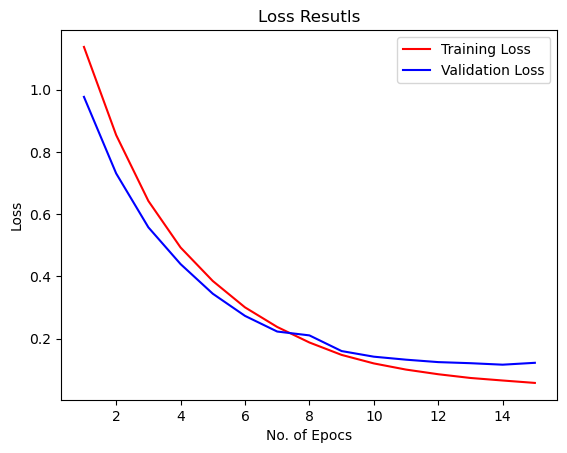

In [14]:
epochs = [i for i in range(1,16)]
plt.plot(epochs, load_history['loss'], color='red', label='Training Loss')
plt.plot(epochs, load_history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("No. of Epocs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Resutls")
plt.show()

## Model Evaluation

In [16]:
model = tf.keras.models.load_model("Trained_Eye_disease_model.keras")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 178 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (4)                    │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

In [18]:
### TEST set
test_set = image_dataset_from_directory(
    "dataset/Dataset - train+val+test/test",
    labels="inferred", # label names inferred from dataset structure
    label_mode="categorical", # catergories are CNV, DME, DRUSSEN, NORMAL << chnage with new categories
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224), # changed to fit MobileNet model
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 10933 files belonging to 4 classes.


In [19]:
# Evaluate and get results
results = model.evaluate(test_set, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"F1 Score: {results[2]}")

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 4), output.shape=(1, None, 4)

In [20]:
test_loss, test_acc, f1_score = model.evaluate(test_set)

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 4), output.shape=(1, None, 4)